In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:/Users/rakes/Desktop/Diabetes_prediction/diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

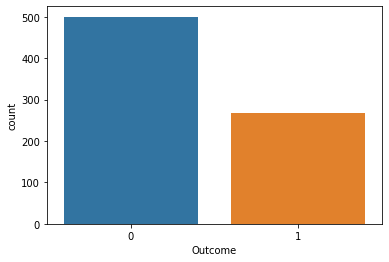

In [45]:
sns.countplot(data['Outcome'])

In [6]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

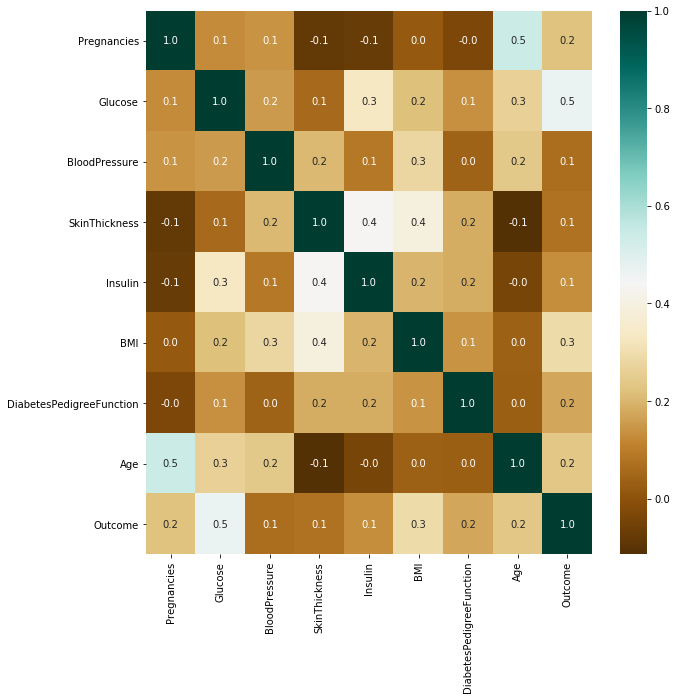

In [11]:
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(), fmt= '.1f',annot = True, cmap="BrBG")

In [12]:
X = data.iloc[:,:-1]
y= data.iloc[:,-1]

In [13]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 12)

In [22]:
print("Glucose : {0}".format(len(data.loc[data['Glucose']==0])))
print("BloodPressure: {0}".format(len(data.loc[data['BloodPressure']==0])))
print("SkinThickness : {0}".format(len(data.loc[data['SkinThickness']==0])))
print("Insulin : {0}".format(len(data.loc[data['Insulin']==0])))
print("BMI : {0}".format(len(data.loc[data['BMI']==0])))
print("DiabetesPredigreeFunction : {0}".format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("Age : {0}".format(len(data.loc[data['Age']==0])))

Glucose : 5
BloodPressure: 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPredigreeFunction : 0
Age : 0


In [29]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy= 'mean', axis= 0)

X_train=  fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [40]:
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
# Creating a pickle file for the classifier
filename = 'diabetes-prediction.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [44]:
model = pickle.load(open('diabetes-prediction.pkl', 'rb'))
print(model.predict([[6,148,72,35,94, 33.6,0.627,50]]))

[1]
